<div style="background-color: #103778; 
            color: white; 
            padding: 10px; 
            text-align: center;
            font-size: 20px;">
    <h1>PARTE I</h1>
</div>

# Introdução
O objetivo deste estudo de caso é construir um modelo de aprendizado de máquina que possa prever o tempo de entrega com base em diversos fatores, a fim de minimizar os atrasos e melhorar a satisfação geral do cliente.

Inicialmente, realizarei o tratamento dos dados, com foco na identificação e correção de valores ausentes e inconsistências. Em seguida, conduzirei a Análise Exploratória dos Dados (EDA), com o objetivo de identificar padrões, tendências e gerar insights relevantes. Após essa etapa, os dados serão preparados para a construção dos modelos de Machine Learning, incluindo a codificação das variáveis categóricas, a criação de novas features e a verificação da tipagem adequada das variáveis.

<div style="background-color: #103778; 
            color: white; 
            padding: 10px; 
            text-align: center;
            font-size: 20px;">
    <h1>1. Configurações Iniciais</h1>
</div>

## 1.1 Importando Bibliotecas e Dataset

In [1]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import utils.funcoes as func

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import do dataset
df = pd.read_excel('data/data_delivery.xlsx')

display(df)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30
...,...,...,...,...,...,...,...,...,...,...,...
45588,7C09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,Meal,motorcycle,32
45589,D641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,Buffet,motorcycle,36
45590,4F8D,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,Drinks,scooter,16
45591,5EEE,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,Snack,motorcycle,26


## 1.2 Visão Geral do Dataset

In [3]:
func.descricão(df)

,Coluna,Tipo,Quantidade de Dados Não Vazios,Quantidade de Dados Vazios,Valores Únicos,Porcentagem de Valor Vazios (%)
ID,ID,object,45593,0,45355,0.000000
Delivery_person_ID,Delivery_person_ID,object,45593,0,1320,0.000000
Delivery_person_Age,Delivery_person_Age,int64,45593,0,22,0.000000
Delivery_person_Ratings,Delivery_person_Ratings,float64,45593,0,28,0.000000
Restaurant_latitude,Restaurant_latitude,float64,45593,0,657,0.000000
Restaurant_longitude,Restaurant_longitude,float64,45593,0,518,0.000000
Delivery_location_latitude,Delivery_location_latitude,float64,45593,0,4373,0.000000
Delivery_location_longitude,Delivery_location_longitude,float64,45593,0,4373,0.000000
Type_of_order,Type_of_order,object,45593,0,4,0.000000
Type_of_vehicle,Type_of_vehicle,object,45593,0,4,0.000000


Não temos dados ausentes e podemos ver a quantidade de valores únicos do nosso dataset além do tipo de dados que estamos lidando.

In [4]:
df.describe().style.background_gradient(cmap='Blues')

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min)
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,29.544075,4.632367,17.017729,70.231332,17.465186,70.845702,26.294607
std,5.696793,0.327708,8.185109,22.883647,7.335122,21.118812,9.383806
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.600000,12.933284,73.170000,12.988453,73.280000,19.000000
50%,29.000000,4.700000,18.546947,75.898497,18.633934,76.002574,26.000000
75%,34.000000,4.800000,22.728163,78.044095,22.785049,78.107044,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,54.000000


<div style="background-color: #103778; 
            color: white; 
            padding: 10px; 
            text-align: center;
            font-size: 20px;">
    <h1>2. Tratamento dos Dados</h1>
</div>

## 2.1 Localização de Origem e Destino 
Antes de iniciarmos nossa exploração dos dados, é importante sabermos a localidade dos restaurantes e locais de entrega presentes do nosso banco de dados. Para isso usarei a latitude e longitude fornecida.

In [5]:
func.plot_origem_destino_map(df, lat_origem = 'Restaurant_latitude', lon_origem = 'Restaurant_longitude', 
                             lat_destino = 'Delivery_location_latitude', lon_destino = 'Delivery_location_longitude')

Nosso conjunto de dados é composto por registros de restaurantes que operam com sistemas de delivery na Índia. No entanto, durante a análise inicial, foi identificado que algumas observações apresentam localizações geográficas inconsistentes, que não correspondem ao território indiano.

Essas inconsistências podem ser detectadas a partir das informações de latitude e longitude fornecidas no conjunto de dados. Com base em princípios geográficos, sabemos que a Índia está situada inteiramente no Hemisfério Norte, o que implica que suas latitudes devem assumir valores positivos, além de não estar próxima à Linha do Equador.

![Latitude e Longitude](<img/Lat e Lon.png>)

Dessa forma, será realizado um processo de tratamento dos dados para identificar e remover registros com:
- Latitudes negativas, que indicam localizações no Hemisfério Sul, incompatíveis com a Índia;
- Valores de latitude próximos de zero, característicos de regiões próximas à Linha do Equador, também incompatíveis com a área geográfica do país.

Esse tratamento é essencial para garantir a consistência espacial dos dados e evitar que informações geográficas incorretas introduzam ruído ou viés nos modelos preditivos.

In [6]:
# Transforma dtype numerico para string
df['Delivery_location_latitude'] = df['Delivery_location_latitude'].astype(str)

# Verifica a primeira 'letra'
verificacao_delivery = df['Delivery_location_latitude'].str.startswith('0')
cont_deli = verificacao_delivery.sum()
print(f'Existem {cont_deli} localidade que começam com 0')

Existem 3640 localidade que começam com 0


In [7]:
# Transforma dtype numerico para string
df['Restaurant_latitude'] = df['Restaurant_latitude'].astype(str)

# Verifica a primeira 'letra'
verificacao_restaurant = df['Restaurant_latitude'].str.startswith('-')
cont_rest = verificacao_restaurant.sum()
print(f'Existem {cont_rest} localidades que começam com -')

Existem 431 localidades que começam com -


Agora que sabemos a quantidade de dados inconsistente, podemos excluir-los do nosso dataset.

In [8]:
# Exclui as linhas que começam com '0' e '-'
df = df[~df['Delivery_location_latitude'].astype(str).str.startswith('0')]
df = df[~df['Restaurant_latitude'].astype(str).str.startswith('-')]

# Transforma novamente de string para numerico
df['Delivery_location_latitude'] = pd.to_numeric(df['Delivery_location_latitude'], errors='coerce')
df['Restaurant_latitude'] = pd.to_numeric(df['Restaurant_latitude'], errors='coerce')

In [9]:
df.describe().style.background_gradient(cmap='Blues')

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min)
count,41522.000000,41522.000000,41522.000000,41522.000000,41522.000000,41522.000000,41522.000000
mean,29.535788,4.631364,18.896960,76.914307,18.960623,76.977970,26.315447
std,5.688640,0.323271,5.461033,3.493224,5.462841,3.493405,9.380634
min,15.000000,1.000000,9.957144,72.768726,9.967144,72.778726,10.000000
25%,25.000000,4.500000,12.986047,73.897902,13.065662,73.939315,19.000000
50%,29.000000,4.700000,19.060834,76.618203,19.115838,76.663067,26.000000
75%,34.000000,4.800000,22.751234,78.368855,22.818060,78.403391,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,54.000000


In [10]:
func.plot_origem_destino_map(df, lat_origem = 'Restaurant_latitude', lon_origem = 'Restaurant_longitude', 
                             lat_destino = 'Delivery_location_latitude', lon_destino = 'Delivery_location_longitude')

Dados de localidades limpos, agora temos apenas os dados de restaurantes e ponto de entrega que ficam na Índia.

<div style="background-color: #103778; 
            color: white; 
            padding: 10px; 
            text-align: center;
            font-size: 20px;">
    <h1>3. Análise Exploratória dos Dados</h1>
</div>

## 3.1 Idade dos Delirevy
Vamos começar nossa análise, calculando a mediana da idade dos delivery (entregadores) por rating (avaliação).

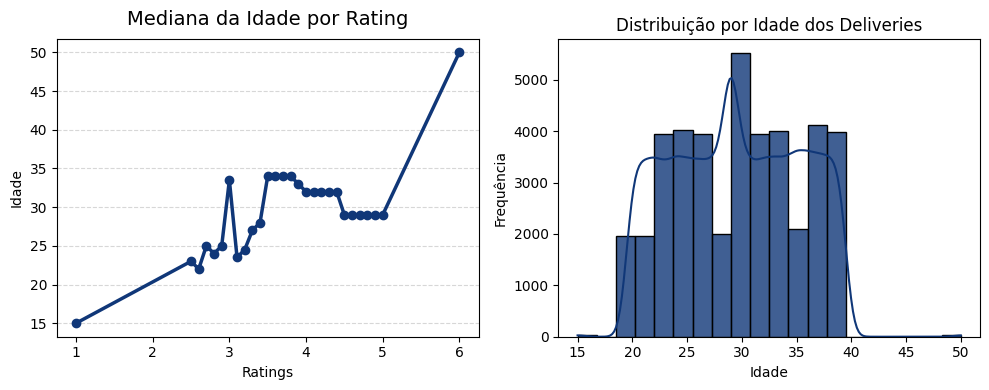

In [11]:
func.plot_delivery_age_analysis(df, col_rating = 'Delivery_person_Ratings', col_age = 'Delivery_person_Age')

Vemos que existe uma tendência geral de aumento da idade conforme o rating cresce, para ratings entre 2,5 e 4,5, a mediana da iade fica relativamente estável concentrada aproximadamente entre 35 e 34 anos. Note que existem entregradores com 15 e 50 anos com poucas observações ou registros, provavelmente indicam outliers, vamos conferir com mais detalhes esse informação. 

In [12]:
df.Delivery_person_Age.value_counts().sort_index().to_frame().style.background_gradient(cmap='Blues')

,count
Delivery_person_Age,
15,25
20,1955
21,1961
22,2021
23,1933
24,2035
25,1984
26,1980
27,1966


Os entregadores com 15 e 50 anos ao todo somam 49 pessoas. Irei excluir esses dados pois considero como sendo **outlines**, no nosso banco de dados.

In [13]:
# Exclui o entregadores com idade de 15 e 50 anos
df = df[~df['Delivery_person_Age'].isin([15, 50])]

df.describe().style.background_gradient(cmap='Blues')

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min)
count,41473.000000,41473.000000,41473.000000,41473.000000,41473.000000,41473.000000,41473.000000
mean,29.532708,4.632761,18.898979,76.913516,18.962636,76.977173,26.318111
std,5.659428,0.309181,5.460570,3.493873,5.462383,3.494052,9.382263
min,20.000000,2.500000,9.957144,72.768726,9.967144,72.778726,10.000000
25%,25.000000,4.500000,12.986047,73.897902,13.065662,73.939315,19.000000
50%,29.000000,4.700000,19.065838,76.618203,19.115838,76.662620,26.000000
75%,34.000000,4.800000,22.751234,78.368855,22.818060,78.403391,32.000000
max,39.000000,5.000000,30.914057,88.433452,31.054057,88.563452,54.000000


## 3.2 Analisando o Tipo de Pedido
Outro elemento importante presente em nosso conjunto de dados é o tipo de pedido. Essa variável é relevante, pois diferentes categorias de pedidos podem impactar diretamente o tempo de preparo, a logística de entrega e, consequentemente, o tempo total de entrega.

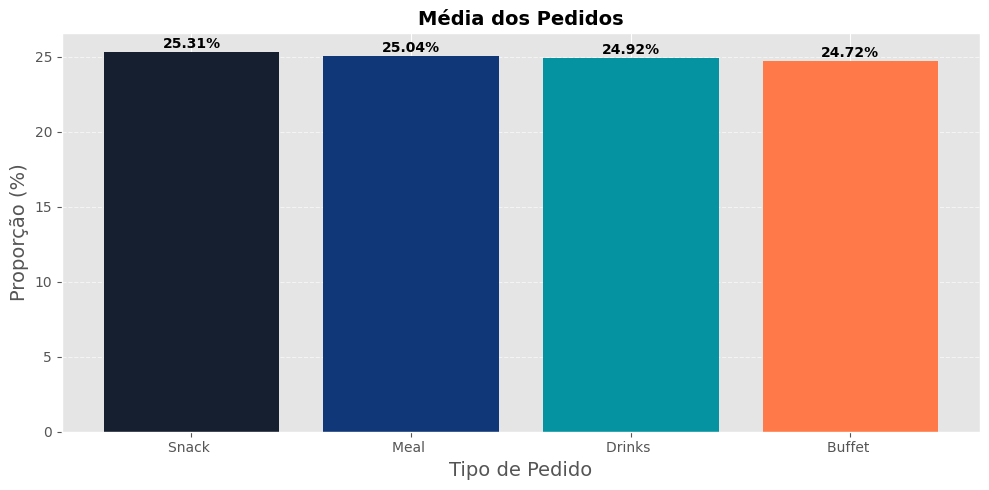

In [14]:
func.plot_proportion_bar(df, column = 'Type_of_order', xlabel='Tipo de Pedido', title='Média dos Pedidos')

Existem quatro tipo de pedido: 
- **Snack** - pode ser um lanche;
- **Meal** - pode ser entendido almoço ou janta, trazendo para o Brasil seria algo como Prato Feito (PF);
- **Drinks** - bebida, não especifica o tipo;
- **Buffet** - serviço de alimentação que leva opções variadas de comidas, muito associado a restaurantes por quilo ou self-service ou até rodízios temáticos.

Em síntese, podemos inferir que Snack se refere a um lanche, Meal e Buffet um almoço ou jantar e o Drink um acompanhamento.

Os quatro tipos de pedido possuem proporções muito semelhantes, todas próximas de 25%, a diferença entre o maior e o menor valor é inferior a 1 ponto percentual, o que indica uma distribuição extremamente equilibrada entre as categorias.

## 3.3 Tipo de Veículo Usado
É de extrema importância para um serviço de delirevy a escolha do tipo de veículo é um fator crucial que impacta diretamente a eficiência, custo e rapidez da operação de delivery, devendo ser alinhada ao tipo de carga, distância e restrições urbanas. 

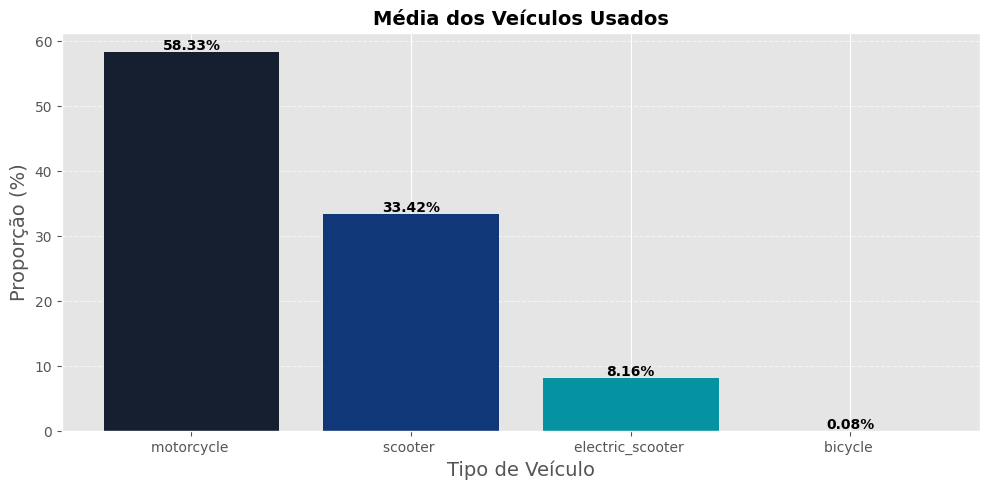

In [15]:
func.plot_proportion_bar(df, column = 'Type_of_vehicle', xlabel='Tipo de Veículo', title='Média dos Veículos Usados')

Temos quatro tipos de veículos:
- Bicicleta;
- Scooter Elétrica;
- Scooter;
- Moto.

São quatro veículos pequenos e ágeis, ideia para produtos pequenos, leves e urgente. Entregas urbanas de curta distância se beneficiam da agilidade de motos ou utilitários leves. Algo muito comum em serviços de delirevy são esses veículos mais rápidos e fáceis de manobrar em trânsito intenso, como motos, são usados para entregas expressas. 

## 3.4 Avaliação dos Entregradores (Delivery)

Uma forma melhor que analisarmos as notas dadas pelos clientes aos delivery (entregadores), é agrupar os valores em intervalos discretos para simplificar ou melhorar o desempenho do modelo que será construído.

In [16]:
# Contagem das notas
df.Delivery_person_Ratings.value_counts().sort_index().to_frame().style.background_gradient(cmap='Blues')

,count
Delivery_person_Ratings,
2.500000,18
2.600000,20
2.700000,21
2.800000,17
2.900000,18
3.000000,6
3.100000,28
3.200000,26
3.300000,23


Para melhor avaliar as notas, irei usar a estratégia de agrupa-las e dividir elas em categorias: **Ruim**, **Regular**, **Bom**, **Ótimo**. Para isso usarei *bins*.
 
`bins` define os limites dos intervalos numéricos (as “caixas”) onde seus valores vão cair. Cada par consecutivo de números em bins forma um intervalo.

Por padrão:
- Intervalos são abertos à esquerda e fechados à direita: (a, b] significa a < x ≤ b

| Categoria | Intervalo  | Exemplos       |
| --------- | ---------- | -------------- |
| Ruim      | (0.5, 2.5] | 1, 1.5, 2, 2.4 |
| Regular   | (2.5, 3.5] | 2.6, 3, 3.4    |
| Bom       | (3.5, 4.5] | 3.6, 4, 4.4    |
| Ótimo     | (4.5, 6.5] | 4.6, 5, 6      |


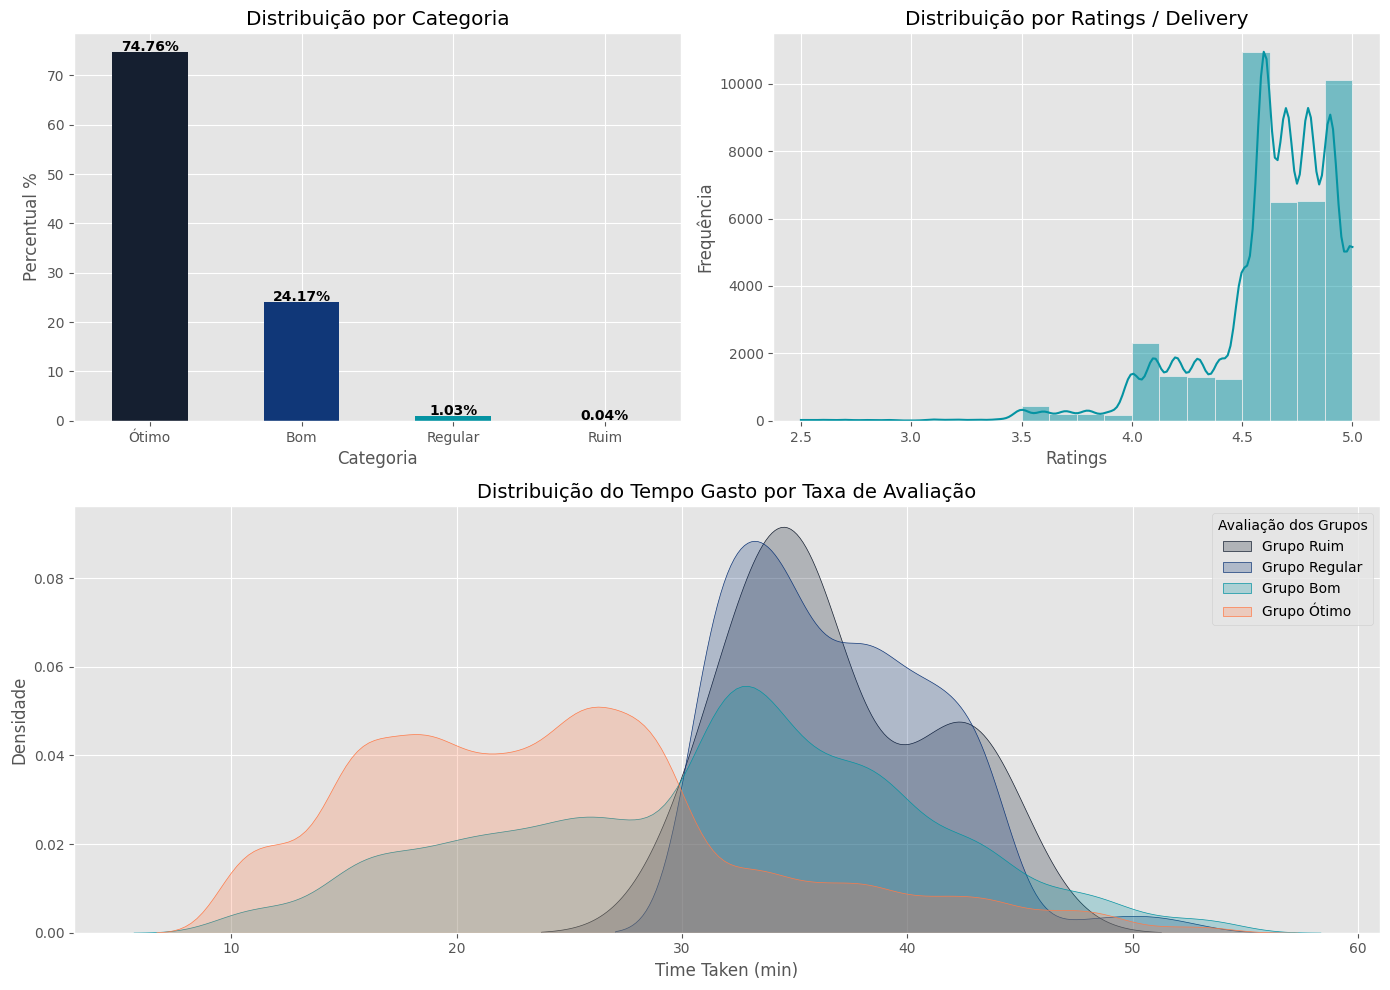

In [17]:
# Separação por bin
bins = [0.5, 2.5, 3.5, 4.5, 6.5]
labels = ['Ruim', 'Regular', 'Bom', 'Ótimo']

df['rating_categoria'] = pd.cut(
    df['Delivery_person_Ratings'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# Agrupando idade dos entregadores por avaliação
df_ratin_age = df.groupby('Delivery_person_Age')['rating_categoria'].value_counts()

func.plot_rating_categoria_analise(df, col_categoria = 'rating_categoria', col_rating = 'Delivery_person_Ratings', col_tempo = 'Time_taken(min)')

## 3.5 Cálculo da Distância entre Restaurante e Local de Entrega
Vamos calcular a distância do restaurante até o local de entrega. Para cada linha do DataFrame, irei calcular a distância em quilômetros entre:
- Restaurante (latitude, longitude)
- Local de entrega (latitude, longitude)

E gravar o resultado na coluna `Distance`.

Essa função recebe:
- lat1, lon1 → ponto de origem
- lat2, lon2 → ponto de destino

Usarei a **Fórmula de Haversine** que é usada para calcular a menor distância entre dois pontos na superfície de uma esfera, como a Terra, usando suas latitudes e longitudes.

In [18]:
def func_distancia(lat1, lon1, lat2, lon2):

    # Converte graus para radianos
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    
    # Diferença entre coordenadas
    newlon = lon2 - lon1
    newlat = lat2 - lat1

    # Fórmula de Haversine - calcula distância entre dois pontos em uma esfera.
    haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2

    # Arco da Esfera
    dist = 2 * np.arcsin(np.sqrt(haver_formula ))

    # Converter para KM
    km = 6367 * dist #use 6367 para converter para KM e 3958 se for usar miles.
    
    return km

# Colunas de origem e destino
dist_cols = ['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude','Delivery_location_longitude']

In [19]:
df['Distance'] = df[dist_cols].apply(
    lambda x: func_distancia(x[0], x[1], x[2], x[3]), 
    axis=1)

<div style="background-color: #103778; 
            color: white; 
            padding: 10px; 
            text-align: center;
            font-size: 20px;">
    <h1>4. Encoder de Variáveis</h1>
</div>

## 4.1 Aplicando OneHotEncoder
Aqui irei aplicar uma técnica chamada **OneHotEncoder**, sua função principal é converter variáveis categóricas nominais (dados que representam categorias sem uma ordem inerente) em um formato numérico que os algoritmos de aprendizado de máquina possam entender e processar de maneira eficaz. 

Aplicarei nas colunas `Type_of_vehicle` e `Type_of_order`.

In [20]:
# Import
from sklearn.preprocessing import OneHotEncoder

# Criando o encoder (codificador)
tip_veiculo = OneHotEncoder(handle_unknown='ignore')

# Fazendo o fit com os dados
tip_veiculo = tip_veiculo.fit(df[['Type_of_vehicle']])

# Transformando os dados
tip_veiculo.transform(df[['Type_of_vehicle']])

# Visualizando em um array
tip_veiculo.transform(df[['Type_of_vehicle']]).toarray()

# Transformando em um dataframe
df_tip_veiculo = pd.DataFrame(tip_veiculo.transform(df[['Type_of_vehicle']]).toarray())

# Obtendo o nome das colunas
colunas_tip_veiculo = tip_veiculo.get_feature_names_out()

# Formatando o nome das colunas no novo dataframe
df_tip_veiculo = pd.DataFrame(tip_veiculo.transform(df[['Type_of_vehicle']]).toarray(),
                              columns = colunas_tip_veiculo,
                              dtype = 'int32')

# Juntar (concatenar) os dois dataframe
df = pd.concat([df.reset_index(drop=True), df_tip_veiculo.reset_index(drop=True)], axis = 1)

In [21]:
# Criando o encoder (codificador)
tip_pedido = OneHotEncoder(handle_unknown='ignore')

# Fazendo o fit com os dados
tip_pedido = tip_pedido.fit(df[['Type_of_order']])

# Transformando os dados
tip_pedido.transform(df[['Type_of_order']])

# Visualizando em um array
tip_pedido.transform(df[['Type_of_order']]).toarray()

# Transformando em um dataframe
df_tip_pedido = pd.DataFrame(tip_pedido.transform(df[['Type_of_order']]).toarray())

# Obtendo o nome das colunas
colunas_tip_pedido = tip_pedido.get_feature_names_out()

# Formatando o nome das colunas no novo dataframe
df_tip_pedido = pd.DataFrame(tip_pedido.transform(df[['Type_of_order']]).toarray(),
                              columns = colunas_tip_pedido,
                              dtype = 'int32')

# Juntar (concatenar) os dois dataframe
df = pd.concat([df.reset_index(drop=True), df_tip_pedido.reset_index(drop=True)], axis = 1)

## 4.2 Aplicando OrdinalEncoder
Aqui irei utilizar outra estrátegia de encoder o OrdinalEncoder que é utilizada para converter dados categóricos ordinais em valores numéricos inteiros. Ele é projetado para variáveis que possuem uma ordem ou hierarquia natural.

In [22]:
# import
from sklearn.preprocessing import OrdinalEncoder

# Separando uma variável com a taxax de avaliação
avaliacao = ['Ruim', 'Regular', 'Bom', 'Ótimo']

# Definindo o codificador
enc = OrdinalEncoder(categories = [avaliacao], dtype = 'int32')

# Fazendo o fit
enc = enc.fit(df[['rating_categoria']])

# transformação
enc.transform(df[['rating_categoria']])

array([[3],
       [2],
       [2],
       ...,
       [3],
       [3],
       [3]], shape=(41473, 1), dtype=int32)

In [23]:
# salvando valores em uma nova coluna
df['Avaliacao'] = enc.transform(df[['rating_categoria']])

<div style="background-color: #103778; 
            color: white; 
            padding: 10px; 
            text-align: center;
            font-size: 20px;">
    <h1>5. Feature Engineering</h1>
</div>

## 5.1 Relação do Tipo de Pedido por Veículo Utilizado
O objetivo é calcular a taxa de veiculo utilizado por tipo de pedido feito.

In [24]:
# Agrupando coluna Type_of_order e Type_of_vehicle
df.groupby('Type_of_order')['Type_of_vehicle'].value_counts().to_frame().style.background_gradient(cmap='Blues')

In [25]:
# Contagem do tipo de pedido por veiculo utilizado
counts = (
    df.groupby('Type_of_order')['Type_of_vehicle']
    .value_counts()
    .rename('count')
    .reset_index()
)

# Total por tipo de pedido
total = (
    df.groupby('Type_of_order')
    .size()
    .rename('total')
    .reset_index()
)

# Merge
freq = counts.merge(total, on='Type_of_order')

# Proporção do veículo dentro do tipo de pedido
freq['vehicle_ratio'] = freq['count'] / freq['total']

df = df.merge(
    freq[['Type_of_order', 'Type_of_vehicle', 'vehicle_ratio']], # selecionando somente as colunas necessárias do DataFrame freq.
    on=['Type_of_order', 'Type_of_vehicle'], #Junta os dados quando essas duas colunas forem iguais”
    how='left' # Mantenha TODAS as linhas do DataFrame da esquerda (df)
)

## 5.2 Média da Distância percorrida por Entregador

In [26]:
mean_dist_driver = (
    df
    .groupby('Delivery_person_ID')['Distance']
    .mean()
    .reset_index(name='mean_distance_driver')
)

df = df.merge(
    mean_dist_driver,
    on='Delivery_person_ID',
    how='left'
)

## 5.3 Média da Distância percorrida por Tipo de Pedido

In [27]:
mean_dist_order = (
    df
    .groupby('Type_of_order')['Distance']
    .mean()
    .reset_index(name='mean_distance_order')
)

df = df.merge(
    mean_dist_order,
    on='Type_of_order',
    how='left'
)

## 5.4 Relação da Distância com a Avaliação
A distância tem uma relação direta e negativa com a avaliação do serviço de delivery: quanto maior a distância, maior a probabilidade de insatisfação do cliente. Isso ocorre principalmente porque distâncias maiores impactam em fatores críticos como o tempo de entrega e o custo do frete. 

Tempo de Entrega é o fator mais crítico. Distâncias maiores aumentam o tempo de trânsito, o que, por sua vez, eleva as chances de atrasos e de o alimento chegar frio ou com a qualidade comprometida. 

In [28]:
mean_dist_rating = (
    df
    .groupby('Avaliacao')['Distance']
    .mean()
    .reset_index(name='mean_distance_rating')
)

df = df.merge(
    mean_dist_rating,
    on='Avaliacao',
    how='left'
)

## 5.5 Idade do Entregados vezez o Rating

In [30]:
df['age_x_rating'] = (df['Delivery_person_Age'] * df['Delivery_person_Ratings'])

In [31]:
display(df)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,...,Type_of_order_Buffet,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Avaliacao,vehicle_ratio,mean_distance_driver,mean_distance_order,mean_distance_rating,age_x_rating
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,...,0,0,0,1,3,0.582301,10.506969,9.806712,9.497729,181.3
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,...,0,0,0,1,2,0.335302,11.249514,9.806712,10.181421,153.0
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,...,0,1,0,0,2,0.579375,9.396230,9.710204,10.181421,101.2
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,...,1,0,0,0,3,0.588258,10.821467,9.677144,9.497729,178.6
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,...,0,0,0,1,3,0.335302,9.036788,9.806712,9.497729,147.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41468,1178,RANCHIRES16DEL01,35,4.2,23.371292,85.327872,23.481292,85.437872,Drinks,motorcycle,...,0,1,0,0,2,0.579375,8.766654,9.710204,10.181421,147.0
41469,7C09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,Meal,motorcycle,...,0,0,1,0,3,0.583398,8.361523,9.657065,9.497729,144.0
41470,4F8D,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,Drinks,scooter,...,0,1,0,0,3,0.336751,8.983493,9.710204,9.497729,147.0
41471,5EEE,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,Snack,motorcycle,...,0,0,0,1,3,0.582301,9.141467,9.806712,9.497729,94.0


In [32]:
df.to_csv('data/data_modelo.csv', index = False)